## 1. Gradient Descent in Linear Fitting

In [1]:
%matplotlib inline 
# %matplotlib tk 
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')   
import numdifftools as nd 

Text(0.5, 1.0, 'A Collection of Dots')

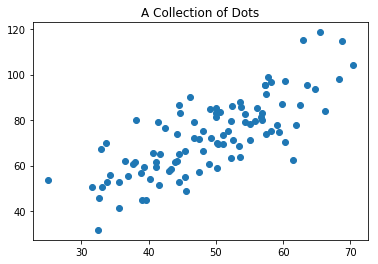

In [2]:
# Plot the dots
fig = plt.figure()
ax = fig.add_subplot(111)
data = [[32.50234527,53.42680403,61.53035803,47.47563963,59.81320787,55.14218841,52.21179669,39.29956669,48.10504169,52.55001444,45.41973014,54.35163488,44.1640495,58.16847072,56.72720806,48.95588857,44.68719623,60.29732685,45.61864377,38.81681754,66.18981661,65.41605175,47.48120861,41.57564262,51.84518691,59.37082201,57.31000344,63.61556125,46.73761941,50.55676015,52.22399609,35.56783005,42.43647694,58.16454011,57.50444762,45.44053073,61.89622268,33.09383174,36.43600951,37.67565486,44.55560838,43.31828263,50.07314563,43.87061265,62.99748075,32.66904376,40.16689901,53.57507753,33.86421497,64.70713867,38.11982403,44.50253806,40.59953838,41.72067636,51.08863468,55.0780959,41.37772653,62.49469743,49.20388754,41.10268519,41.18201611,50.18638949,52.37844622,50.13548549,33.64470601,39.55790122,56.13038882,57.36205213,60.26921439,35.67809389,31.588117,53.66093226,46.68222865,43.10782022,70.34607562,44.49285588,57.5045333,36.93007661,55.80573336,38.95476907,56.9012147,56.86890066,34.3331247,59.04974121,57.78822399,54.28232871,51.0887199,50.28283635,44.21174175,38.00548801,32.94047994,53.69163957,68.76573427,46.2309665,68.31936082,50.03017434,49.23976534,50.03957594,48.14985889,25.12848465],[31.70700585,68.77759598,62.5623823,71.54663223,87.23092513,78.21151827,79.64197305,59.17148932,75.3312423,71.30087989,55.16567715,82.47884676,62.00892325,75.39287043,81.43619216,60.72360244,82.89250373,97.37989686,48.84715332,56.87721319,83.87856466,118.5912173,57.25181946,51.39174408,75.38065167,74.76556403,95.45505292,95.22936602,79.05240617,83.43207142,63.35879032,41.4128853,76.61734128,96.76956643,74.08413012,66.58814441,77.76848242,50.71958891,62.12457082,60.81024665,52.68298337,58.56982472,82.90598149,61.4247098,115.2441528,45.57058882,54.0840548,87.99445276,52.72549438,93.57611869,80.16627545,65.10171157,65.56230126,65.28088692,73.43464155,71.13972786,79.10282968,86.52053844,84.74269781,59.35885025,61.68403752,69.84760416,86.09829121,59.10883927,69.89968164,44.86249071,85.49806778,95.53668685,70.25193442,52.72173496,50.39267014,63.64239878,72.24725107,57.81251298,104.25710159,86.64202032,91.486778,55.23166089,79.55043668,44.84712424,80.20752314,83.14274979,55.72348926,77.63418251,99.05141484,79.12064627,69.58889785,69.51050331,73.68756432,61.36690454,67.17065577,85.66820315,114.85387123,90.12357207,97.91982104,81.53699078,72.11183247,85.23200734,66.22495789,53.45439421]]
ax.scatter(*data)
plt.title('A Collection of Dots')

Form of the fitting Line: $ f(x)=m*x+b $ <br>

A parameter pair of (m, b) is what we want to minimize the this objective function: $Cost=\frac{1}{n}\sum\limits_{i=1}^n (y_i-f(x_i))^2  $, in which $(x_i, y_i)$ is the coordinate of dot i<br>

Starting from (m, b) = (0, 0), we hope to find a new pair of (m, b) which gives us a lower value of objective function in each iteration<br> 
The following partial derivatives will guide the decline of objective function on a m vs. b plot<br>
$ \frac{\partial Cost}{\partial m} = \frac{1}{n}\sum\limits_{i=1}^n -2x_i(y_i-(m*x_i+b)) \\
\frac{\partial Cost}{\partial b} = \frac{1}{n}\sum\limits_{i=1}^n -2(y_i-(m*x_i+b))$ 

In [3]:
def Gradient(m_and_b, data):
    m, b = m_and_b[0], m_and_b[1]
    deriv_m = np.mean([-2*x*(y-m*x-b) for x,y in zip(*data)]) # the partial derivative of cost with respect to m 
    deriv_b = np.mean([-2*(y-m*x-b)   for x,y in zip(*data)]) # the partial derivative of cost with respect to b 
    return np.array([deriv_m, deriv_b])

def costFunction(m_and_b, data): 
    m, b = m_and_b[0], m_and_b[1]
    return np.mean([(y-(m*x+b))**2 for x,y in zip(*data)])

Let's see what happens after 25 iterations of changing (m, b) according to respective partial derivatives<br>
$ (m, b) = (m, b)_{i-1}-\alpha*\nabla Cost $ , $\alpha $  is the learning rate

Final (m, b) = (1.479, 0.031)


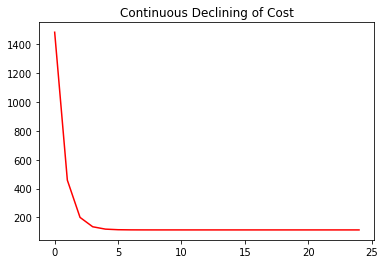

In [4]:
(m, b) = (0., 0.) # inital_m, inital_b  
m_and_b = np.array([m, b]) 

iterations = 25
learning_rate = 0.0001
costs = [] 
for i in range(iterations):
    m_and_b = m_and_b - learning_rate * Gradient(m_and_b, data)
    costs.append(costFunction(m_and_b,data))
    
m_and_b = np.around(m_and_b, 3)
(m, b) = m_and_b
print("Final (m, b) = ({}, {})".format(m, b)) 
plt.title('Continuous Declining of Cost')
plt.plot(range(iterations),costs, color='r')

Plot the fitting line using the final (m, b) and it shows the result is good enough

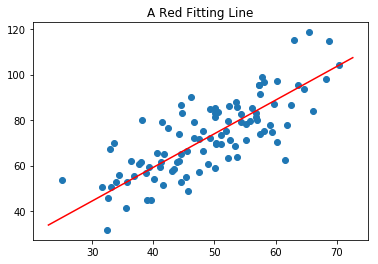

In [5]:
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = m*x + b  
ax.plot(x,y, color='r') 
ax.set_title('A Red Fitting Line')
ax.get_figure()

## 2. Finding Minima for $\begin{equation*} f(x) = x^2(x - 2), \space x\in[0.6667,2]  \end{equation*} $ by using Newton’s method 

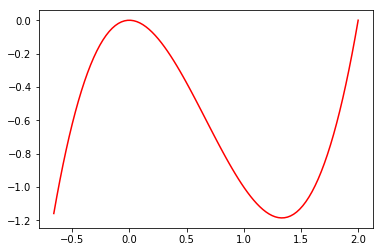

In [6]:
f = lambda x: x*x*(x-2)  

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-0.66, 2, 100) 
ax.plot(x,f(x),color='r') 

In [7]:
minima = 4/3 # true minima 1.33333
x = 0.6667   #

import numdifftools as nd
fd = nd.Derivative(f, n=1)
sd = nd.Derivative(f, n=2)
step_count = 0
while not np.isclose(x,minima,atol=0.01): 
    x -= fd(x)/sd(x)
    step_count += 1
print('In {} steps, the minima {} is reached by using Newton\'s method'.format(step_count, round(x,3))) 

In 16 steps, the minima 1.335 is reached by using Newton's method


### 2.1 Optimization in concave part leads to maxima

In [8]:
x = 0.666 # sd(0.6666)<0 concave 
          # sd(2/3)=0  
          # sd(0.6667)>0 convex
for i in range(30): 
    x -= fd(x)/sd(x)  
print('After 30 iterations, a local maxima {} is reached'.format(round(x,3))) 

After 30 iterations, a local maxima 0.0 is reached


Doing quadratic optimization in concave part 

## 3. Newton’s Method on A Multivariable Function 
Finding the Minima for $\begin{equation*} f(x_0, x_1) = x_0^4+x_1^4 \end{equation*}$ 

In [9]:
f = lambda x: x[0]**4+x[1]**4

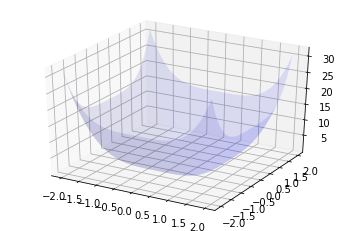

In [10]:
ax = plt.figure().add_subplot(111, projection='3d') # get the current 3d axis, or it will be created  

delta = 0.02
x0 = np.arange(-2.0, 2.0, delta)
x1 = np.arange(-2.0, 2.0, delta)  
z_obj = np.array([[f((i,j)) for i in x0] for j in x1]) 

x0, x1 = np.meshgrid(x0, x1)
ax.plot_surface(x0, x1, z_obj, color='b', alpha=0.1) 

plt.show()

$f(x_0, x_1) = x_0^4+x_1^4 $ <br>

Gradient: $\nabla f=(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}) =(4x_0^3, 4x_1^3)$ <br>
Hessian: $ H = \nabla^2 f= 
\begin{bmatrix} 
    \frac{\partial f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1\partial x_2} \\
    \frac{\partial^2 f}{\partial x_2\partial x_1} & \frac{\partial f}{\partial x_2^2}
\end{bmatrix}
=
\begin{bmatrix}
    12x_0^2  &  0 \\
    0  &  12x_1^2
\end{bmatrix} $ <br>

Optimization Strategy: $  x_i=x_{i-1} - H^{-1}\cdot\nabla f  $

In [11]:
x = np.array([10., 10.])                       # first point, an arbitrary point
minima = (0., 0.)                              # minima
step_count = 0
 
fd = nd.Gradient(f)                            # first derivative
sd = nd.Hessian(f)                             # second derivative

while not np.allclose(x, minima, atol=1e-5):   # stop when x is near minima
    step_count += 1 
    Gradient    = fd(x)
    Hessian     = sd(x) 
    Inverted_Hessian = np.linalg.inv(Hessian)
    x -= Inverted_Hessian.dot(Gradient)
print('In {} steps, the minima {} is reached by using Newton\'s method'.format(step_count, np.around(x, 3))) 

In 35 steps, the minima [0. 0.] is reached by using Newton's method
